# Fully connected Deep neural network for handwritten digits recognition

## Import libraries

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils import to_categorical

## Get mnist dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Print the shapes of the dataset

In [3]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


## Try show the first image in the X_train 3D array

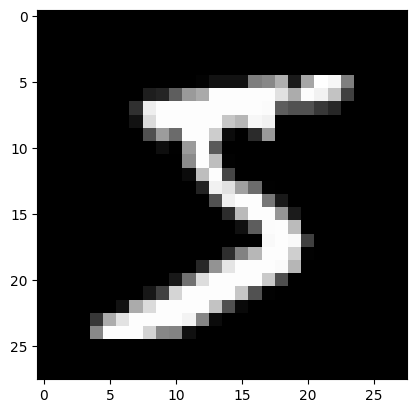

In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

## Reshape the images from 2D to 1D and scale between 0 to 1

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784) / 255.0
X_test = X_test.reshape(X_test.shape[0], 784) / 255.0

## Make the labels into categorical or one-hot with 10 possible situations

In [6]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

## Init model

In [7]:
model = Sequential()

## Add hidden layers

In [8]:
model.add(Dense(units=256, activation="relu", input_dim=784))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=256, activation="relu"))

c:\Users\xuerui-wang\Coding\ele-AI-tutorial\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Add the output layer

In [9]:
model.add(Dense(units=10, activation="softmax"))

## Compile the model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Train the model

In [11]:
model.fit(X_train, Y_train, epochs=100, batch_size=1024)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2059 - loss: 2.2559
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5179 - loss: 2.0313
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6473 - loss: 1.7137
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7308 - loss: 1.3322
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7842 - loss: 1.0168
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8143 - loss: 0.8146
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8349 - loss: 0.6887
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8506 - loss: 0.6061
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8586 - loss: 0.5496
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8689 - loss: 0.5016
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8735 - loss: 0.4711
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step

## Evaluate the model

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("loss:", loss)
print("accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9414 - loss: 0.1992
loss: 0.17326155304908752
accuracy: 0.9498999714851379


## Manual testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction: [9], Correct: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: [2], Correct: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: [0], Correct: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: [4], Correct: 9


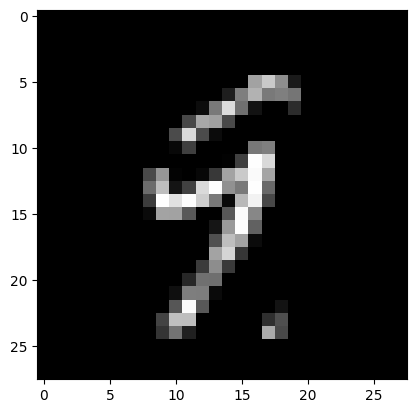

In [13]:
import random

random_start = random.randint(0, 9990)
for i in range(random_start, random_start + 10):
  X_single = X_test[i].reshape(1, 784)
  prediction = model.predict(X_single)

  predicted_class = np.argmax(prediction, axis=1)
  label = np.argmax(Y_test[i])
  print(f"Prediction: {predicted_class}, Correct: {label}")

  if predicted_class != label:
    img = X_single.reshape(28, 28)
    plt.imshow(img, cmap="gray")
    break